In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("../data/Social_Network_Ads.csv")
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
X = data.drop("Purchased",axis=1)
y = data["Purchased"]

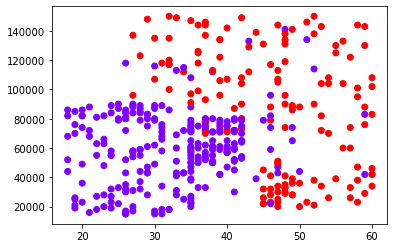

In [4]:
plt.scatter(X["Age"],X["EstimatedSalary"],c=y,cmap="rainbow")

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,weights="uniform",metric="minkowski",n_jobs=-1)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

CPU times: user 11.3 ms, sys: 4.11 ms, total: 15.4 ms
Wall time: 12.5 ms


0.95

In [46]:
%%time
knn_1 = KNeighborsClassifier()
knn_1.fit(X_train_scaled,y_train)
knn_1.score(X_test_scaled,y_test)

CPU times: user 7.93 ms, sys: 3.79 ms, total: 11.7 ms
Wall time: 8.15 ms


0.95

In [17]:
knn.predict(scaler.transform([[30,87000]]))

array([0])

In [18]:
y_preds = knn.predict(X_test_scaled)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix(y_test,y_preds)

array([[55,  3],
       [ 1, 21]])

In [20]:
accuracy_score(y_test,y_preds)

0.95

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


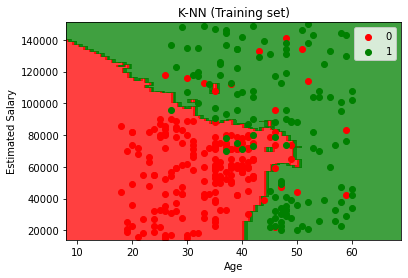

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()